# Red Wine Quality Project

# Implementing Logistic Regression from Scratch

### Importing All The Required Libraries

In [504]:
#importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import math

### Reading The Given CSV File And Printing First Few Rows

In [505]:
#Reading the CSV file and storing it under variable name 'redwine'
redwine=pd.read_csv("redwinequality.csv")

#Printing first 10 rows of dataframe 
redwine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


### Appending New Column 'Quality Check' based on quality score of dataframe

In [506]:
#Appending new binary 'Quality Check' column based on quality score [quality>=6(1) or (quality<=5(0))]
redwine["QualityCheck"]=(redwine['quality']>=6).astype('uint8')

#Printing first 10 rows of dataframe 
redwine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,QualityCheck
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0


### Checking the shape of the dataframe

In [507]:
#Checking the shape of 'redwine'
redwine.shape

(1599, 13)

### Obtaining Basic Statistical Measure of the dataframe 

In [508]:
#Obtaining basic statistical measure of 'redwine'
redwine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,QualityCheck
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.534709
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


### Getting the Information (i.e, the number of rows and the data types present in each column) of the dataframe 

In [509]:
#Printing the information of 'redwine'
redwine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  QualityCheck          1599 non-null   uint8  
dtypes: float64(11), int64(1), uint8(1)
memory usage: 151.6 KB


### Looking for some missing values in the dataframe

In [510]:
#Looking for some missing values in 'redwine'
redwine.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,QualityCheck
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False,False


### Finding the total number of missing values in the dataframe

In [511]:
#Finding the numbers of missing values in 'redwine'
redwine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
QualityCheck            0
dtype: int64

### Graphical Representation of relation between various parameters of the dataframe using Pairplot

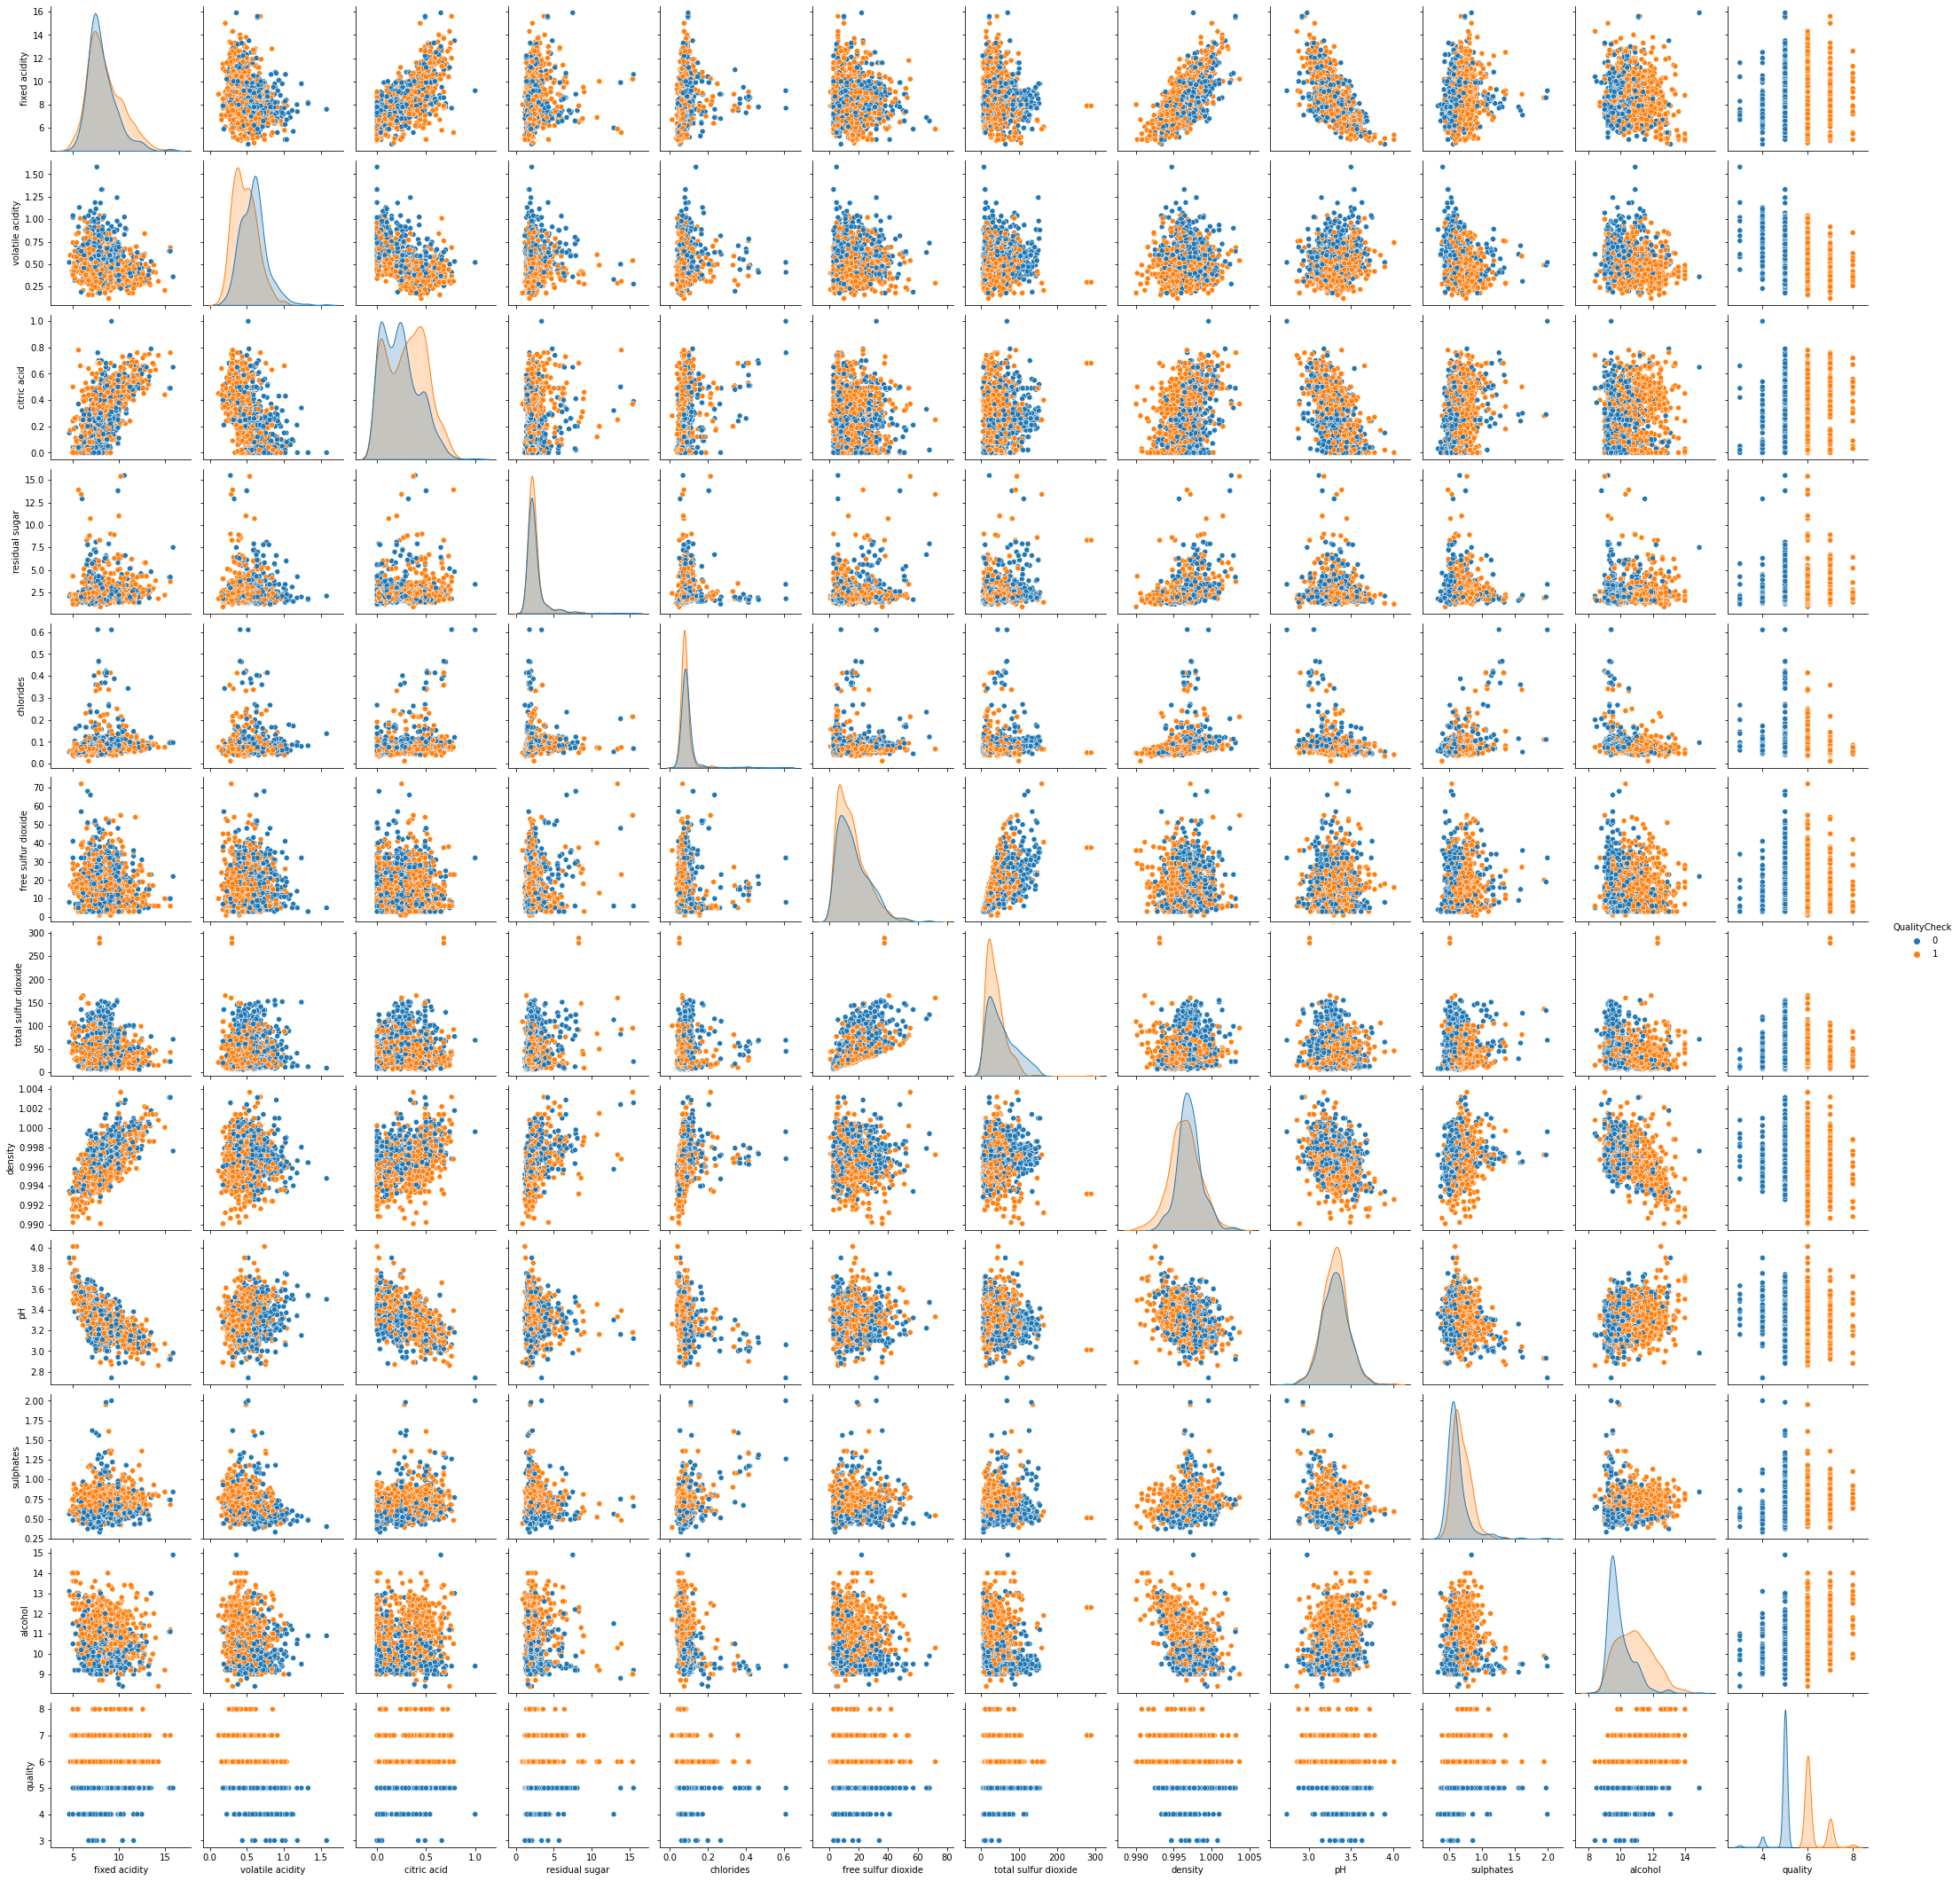

In [512]:
#Reprsenting scatterplot of 'redwine' using pairplot function from seaborn library
sns.pairplot(redwine, hue='QualityCheck')

### Visulaization of Quality Score of Red Wine using Countplot function of Seaborn

<AxesSubplot:xlabel='quality', ylabel='count'>

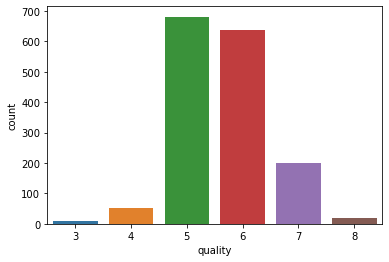

In [513]:
#Showing total count of quality scores of 'redwine'
sns.countplot(x=redwine['quality'])

### Creating a copy of the original dataframe with necessary parameters only

In [514]:
#Creating a copy of 'redwine' and storing it in variable named 'winequality'
winequality=redwine.copy()

#Excising the 'quality' column from the 'winequality' 
winequality=winequality.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,12]]

#Printing first 10 rows of the 'winequality'
winequality.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,QualityCheck
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


### Visulaization of Total Good and Bad Qaulity of Red Wine using Countplot function of Seaborn

<AxesSubplot:xlabel='QualityCheck', ylabel='count'>

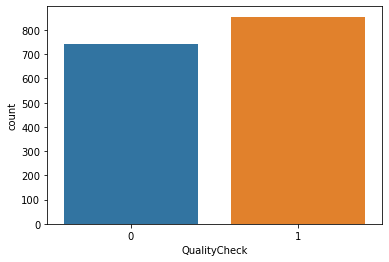

In [515]:
#Showing total count of Good and Bad quality of redwine
sns.countplot(x=winequality['QualityCheck'])

### Calculating the Correlation between all the parameters of dataframe 

In [516]:
#Calculating the corelation coefficient between different parameters of 'winequlaity'
correlation=winequality.corr()
correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,QualityCheck
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.095093
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.321441
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.159129
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,-0.002160
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.109494
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.061757
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.231963
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.159110
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.003264
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.218072


### Displaying the heatmap of Correlation Coefficient using above Correlation Matrix

<AxesSubplot:>

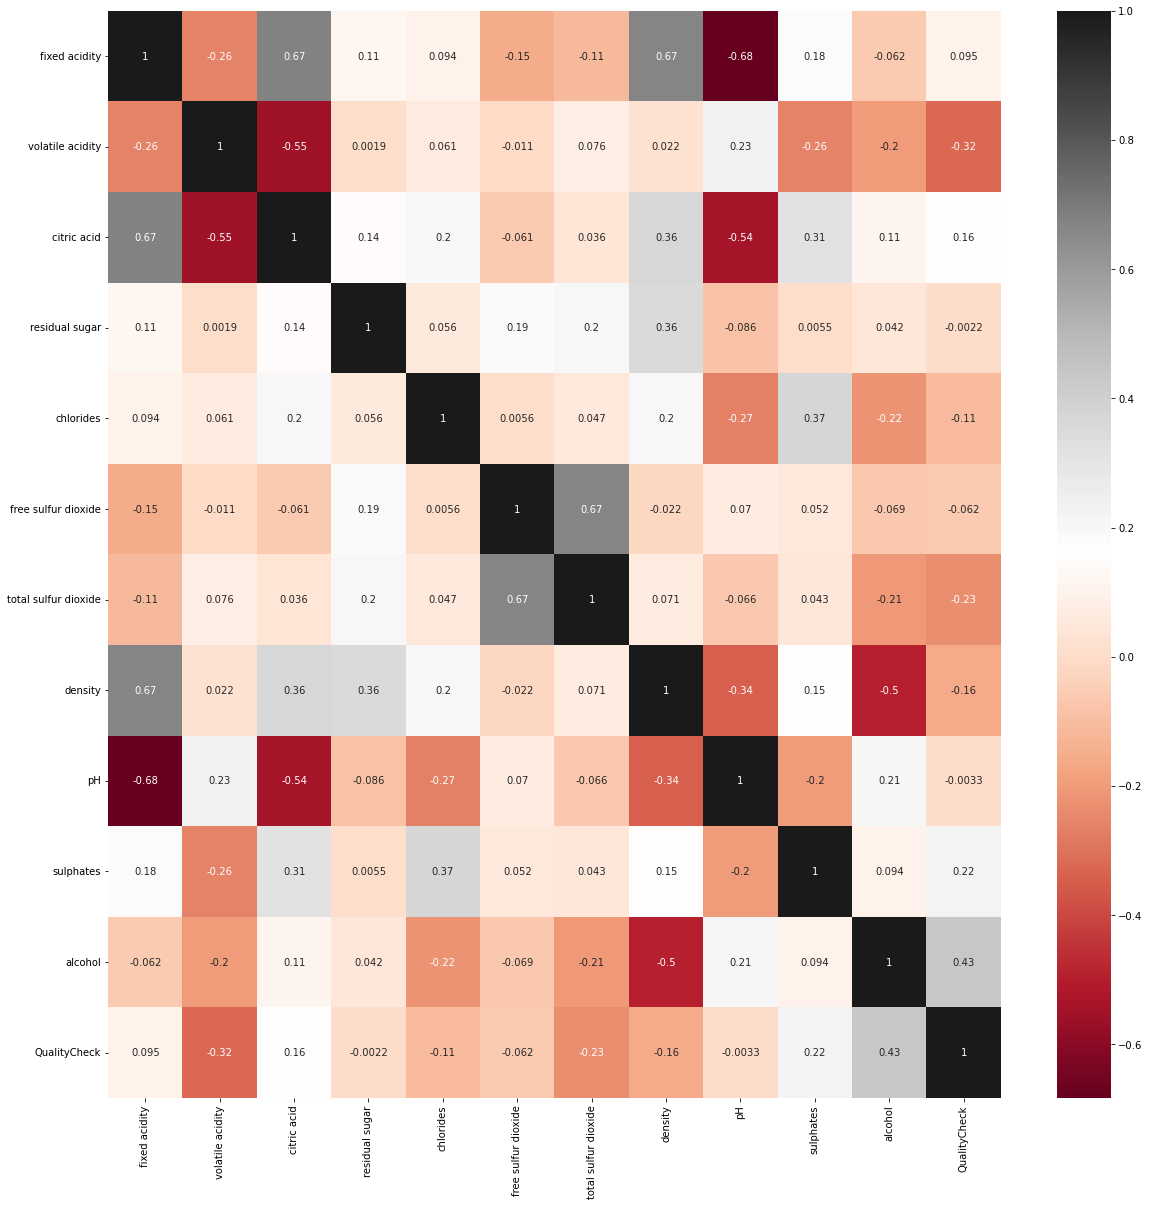

In [517]:
#Displaying heatmap using library function of seaborn
plt.figure(figsize=(20,20))
sns.heatmap(correlation, annot=True, cmap='RdGy')

### Converting all the parameters of the dataframe to their Standard Unit and Adding them to the Dataframe

In [518]:
#converting fixed acidity into standard unit
winequality['fixed acidity (standard)']=(winequality['fixed acidity']-np.mean(winequality['fixed acidity']))/np.std(winequality['fixed acidity'])

#converting volatile acidity into standard unit
winequality['volatile acidity (standard)']=(winequality['volatile acidity']-np.mean(winequality['volatile acidity']))/np.std(winequality['volatile acidity'])

#converting citric acid into standard unit
winequality['citric acid (standard)']=(winequality['citric acid']-np.mean(winequality['citric acid']))/np.std(winequality['citric acid'])

#converting residual sugar into standard unit
winequality['residual sugar (standard)']=(winequality['residual sugar']-np.mean(winequality['residual sugar']))/np.std(winequality['residual sugar'])

#converting chlorids into standard unit
winequality['chlorides (standard)']=(winequality['chlorides']-np.mean(winequality['chlorides']))/np.std(winequality['chlorides'])

#converting free sulfur dioxide into standatd unit
winequality['free sulfur dioxide (standard)']=(winequality['free sulfur dioxide']-np.mean(winequality['free sulfur dioxide']))/np.std(winequality['free sulfur dioxide'])

#convert total sulfur dioxide into standard unit
winequality['total sulfur dioxide (standard)']=(winequality['total sulfur dioxide']-np.mean(winequality['total sulfur dioxide']))/np.std(winequality['total sulfur dioxide'])

#converting density into standard unit                                                                                                 
winequality['density (standard)']=(winequality['density']-np.mean(winequality['density']))/np.std(winequality['density'])

#converting pH into standard unit
winequality['pH (standard)']=(winequality['pH']-np.mean(winequality['pH']))/np.std(winequality['pH'])

#converting sulphates into standard unit
winequality['sulphates (standard)']=(winequality['sulphates']-np.mean(winequality['sulphates']))/np.std(winequality['sulphates'])

#converting alcohol into standard unit
winequality['alcohol (standard)']=(winequality['alcohol']-np.mean(winequality['alcohol']))/np.std(winequality['alcohol'])

#Printing first 10 rows of 'winequality'
winequality.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,volatile acidity (standard),citric acid (standard),residual sugar (standard),chlorides (standard),free sulfur dioxide (standard),total sulfur dioxide (standard),density (standard),pH (standard),sulphates (standard),alcohol (standard)
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,...,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,...,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,...,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,...,0.738418,-1.391472,-0.524166,-0.264960,-0.274931,-0.196679,0.558274,1.288643,-0.579207,-0.960246
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,...,0.403229,-1.083370,-0.666062,-0.392483,-0.083669,0.381091,-0.183745,-0.072005,-1.169337,-0.960246
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,...,0.682553,-1.391472,-0.949853,-0.477498,-0.083669,-0.774449,-1.137769,0.511130,-1.110324,-0.397043
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,...,0.291499,-1.288771,-0.382271,-0.307468,-0.657454,-0.865676,0.028261,0.316751,-0.520193,-0.866379
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,...,-0.155419,0.457144,2.526589,-0.349975,0.107592,1.688677,0.558274,0.251958,0.837107,0.072294


### Random Shuffling of Data and Splitting our dataframe into Training(70%) and Testing(30%) Sets

In [519]:
#Shuffling all the data of rows of 'winequality'
random=winequality.sample(len(winequality.axes[0]), replace = False)

#Splitting data into train set(70% of 1599=1119)
train_set=random.iloc[0:1119, :]

#Splitting data into test set(30% of 1599=480)
test_set=random.iloc[1119:, :]

### Printing First few rows of our Train and Test sets

In [520]:
#Printing first 5 rows of training set
train_set.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,volatile acidity (standard),citric acid (standard),residual sugar (standard),chlorides (standard),free sulfur dioxide (standard),total sulfur dioxide (standard),density (standard),pH (standard),sulphates (standard),alcohol (standard)
1019,7.0,0.50,0.14,1.8,0.078,10.0,23.0,0.99636,3.53,0.61,...,-0.155419,-0.672566,-0.524166,-0.201199,-0.561823,-0.713631,-0.204945,1.418228,-0.284141,-0.021574
1338,6.0,0.50,0.00,1.4,0.057,15.0,26.0,0.99448,3.36,0.45,...,-0.155419,-1.391472,-0.807957,-0.647527,-0.083669,-0.622404,-1.201371,0.316751,-1.228350,-0.866379
488,11.6,0.32,0.55,2.8,0.081,35.0,67.0,1.00020,3.32,0.92,...,-1.160984,1.432803,0.185312,-0.137438,1.828946,0.624363,1.830307,0.057580,1.545264,0.353895
571,6.2,0.36,0.24,2.2,0.095,19.0,42.0,0.99460,3.57,0.57,...,-0.937525,-0.159061,-0.240375,0.160114,0.298854,-0.135861,-1.137769,1.677400,-0.520193,1.198701
964,8.5,0.47,0.27,1.9,0.058,18.0,38.0,0.99518,3.16,0.85,...,-0.323013,-0.005010,-0.453218,-0.626274,0.203223,-0.257497,-0.830361,-0.979104,1.132173,0.635497


In [521]:
#Printing first 5 rows of testing set
test_set.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,volatile acidity (standard),citric acid (standard),residual sugar (standard),chlorides (standard),free sulfur dioxide (standard),total sulfur dioxide (standard),density (standard),pH (standard),sulphates (standard),alcohol (standard)
1539,7.2,0.390,0.32,1.8,0.065,34.0,60.0,0.99714,3.46,0.78,...,-0.769931,0.251743,-0.524166,-0.477498,1.733315,0.411500,0.208465,0.964679,0.719081,-0.490910
802,5.1,0.585,0.00,1.7,0.044,14.0,86.0,0.99264,3.56,0.94,...,0.319432,-1.391472,-0.595114,-0.923826,-0.179300,1.202134,-2.176596,1.612607,1.663290,2.325108
1456,6.0,0.540,0.06,1.8,0.050,38.0,89.0,0.99236,3.30,0.50,...,0.068040,-1.083370,-0.524166,-0.796303,2.115838,1.293361,-2.325000,-0.072005,-0.933285,0.119227
315,7.1,0.350,0.29,2.5,0.096,20.0,53.0,0.99620,3.42,0.65,...,-0.993390,0.097691,-0.027532,0.181368,0.394484,0.198638,-0.289747,0.705508,-0.048089,0.541630
325,10.0,0.490,0.20,11.0,0.071,13.0,50.0,1.00150,3.16,0.69,...,-0.211283,-0.364463,6.003031,-0.349975,-0.274931,0.107411,2.519325,-0.979104,0.187963,-1.147981


### Printing Length of our Training and Testing sets

In [522]:
#Printing the length of training(70%) and testing(30%) sets
print('Number of rows in training set is: ', len(train_set))
print('Number of rows in testing set is: ', len(test_set))

Number of rows in training set is:  1119
Number of rows in testing set is:  480


### Separating different parameters from dataframe as Dependent or Target Variable(Y) and Independent Feature(X)

In [523]:
#Selecting the independent features of 'winequality' as X_train and X_test
X_train=train_set.iloc[:, 12:].values
X_test=test_set.iloc[:, 12:].values

#Selecting the target variable of 'winequality' as Y_train and Y_test
Y_train=train_set.iloc[:, 11].values
Y_test=test_set.iloc[:, 11].values

#Reshaping the target variable of 'winequality'
Y_train=np.reshape(Y_train, (len(Y_train), 1))
Y_test=np.reshape(Y_test, (len(Y_test), 1))

#Displaying the shape of matrix of train set
print("X_train_Shape:", np.shape(X_train))
print("Y_train_Shape:", np.shape(Y_train))

#Displaying the shape of matrix of test set
print("X_test_Shape:", np.shape(X_test))
print("Y_test_Shape:", np.shape(Y_test))

X_train_Shape: (1119, 11)
Y_train_Shape: (1119, 1)
X_test_Shape: (480, 11)
Y_test_Shape: (480, 1)


### Transposing 'X_train' and 'X_test' as 'X_train_trans' and 'X_test_trans' for the purpose of vectorization 
### Stacking a rows of ones vertically to 'X_train_trans' and 'X_test_trans" as 'X_train_Aug' and 'X_test_Aug'

In [524]:
#Transposing the X_train and X_test dataset
X_train_trans=np.transpose(X_train)
X_test_trans=np.transpose(X_test)

#Stacking a rows of ones vertically to X_train and X_test dataset
X_train_Aug=np.vstack((np.ones((1,len(X_train))),X_train_trans))
X_test_Aug=np.vstack((np.ones((1,len(X_test))),X_test_trans))

#Displaying the shape of augmented matrix of X_train_Aug and X_test_Aug
print("Shape of X_train_Aug: ", np.shape(X_train_Aug))
print("Shape of X_test_Aug: ", np.shape(X_test_Aug))

Shape of X_train_Aug:  (12, 1119)
Shape of X_test_Aug:  (12, 480)


### Defining Theta as a 2D array of Zeros

In [473]:
#Defining theta as a 2D array of zeros
theta=np.zeros((12,1))
print("Shape of Theta is: ", np.shape(theta))

Shape of Theta is:  (12, 1)


### Implementing the Gradient Descent Algorithm by minimizing the cost function and finding the values of Theta

In [525]:
#Total number of  iteration
no_of_iteration=np.arange(1,50001)

#Setting the learning rate
alpha=0.005

#Finding length of X_train
l_train=len(X_train)

#Finding the length of X-test
l_test=len(X_test)

#Creating an empty list to append the values of cost function in each iteration
costfunc=[]


#Iterating the loop for gradient descent
for i in no_of_iteration:
    #Hypothesis function (It is matrix of size 1 * 1119)
    z=np.transpose(theta)@X_train_Aug
    
    #Sigmoid Function Equation:
    p = (1/(1+np.exp(-z)))
    
    #Cost Function if predicted value(wrong presiction) is 1(Good)
    ft = ((np.log10((1/(1+np.exp(-z)))))@Y_train)[0,0]
    
    #Cost Function if predicted value(wrong presiction) is 0(Bad)
    st = ((np.log10(1-(1/(1+np.exp(-z)))))@(1-Y_train))[0,0]
    
    #Finding the cost function Overall(It is just a single number)
    cf = (1/l_train)*(-ft-st) 
    
    #Appending the cost function to empty list
    costfunc.append(cf)
    
    #Calculating derivative of cost function
    delthetaj = (1/l_train)*((X_train_Aug)@(np.transpose(p)-Y_train))
    
    #Updating the values of theta after each iteration
    theta = theta-(alpha*delthetaj)
    
#Printing the length of cost function
print(len(costfunc))

#Printing the final values of theta
print(theta)

50000
[[ 0.17355782]
 [ 0.12985111]
 [-0.56288902]
 [-0.23157017]
 [ 0.13191145]
 [-0.24756623]
 [ 0.25335134]
 [-0.5690781 ]
 [-0.12152092]
 [-0.16203673]
 [ 0.42499124]
 [ 0.89332113]]


### Testing our Trained Model on both Training and Testing set

In [526]:
#Testing the model on train set
Y_train_pred = np.zeros((l_train,1))
h_Theta = np.transpose(theta)@X_train_Aug
h_Theta_trans = np.transpose(h_Theta)

#Comparing the predicted results and actual results
for j in range(l_train):
    if  1/(1+np.exp(-h_Theta_trans[j])) >= 0.5: 
        Y_train_pred[j] = [1]
    else: 
        Y_train_pred[j] = [0]
#Printing out training sample
print("Training Sample: ", Y_train)

#Priniting our predicted training sample
print("Predicted Training Sample: ", Y_train_pred)

Training Sample:  [[0]
 [0]
 [1]
 ...
 [1]
 [0]
 [1]]
Predicted Training Sample:  [[1.]
 [0.]
 [1.]
 ...
 [1.]
 [0.]
 [1.]]


In [527]:
#Testing the model on test set
Y_test_pred = np.zeros((l_test,1))
h_Theta = np.transpose(theta)@X_test_Aug
h_Theta_trans = np.transpose(h_Theta)

#Comparing the predicted results and actual results
for j in range(l_test):
    if  1/(1+np.exp(-h_Theta_trans[j])) >= 0.5: 
        Y_test_pred[j] = [1]
    else: 
        Y_test_pred[j] = [0]
#Printing out testing sample
print("Testing Sample: ", Y_test)

#Priniting our predicted testing sample
print("Predicted Testing Sample: ", Y_test_pred)

Testing Sample:  [[0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1

### Graphical Reprentation of Relation between Cost Function and Number of Iterations

Text(0.5, 1.0, 'Cost Function vs. Number of iterations')

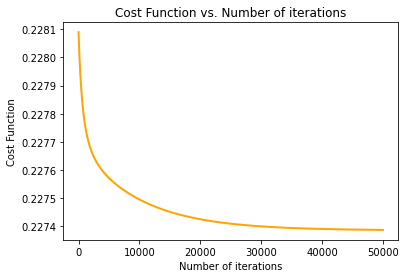

In [528]:
#Plotting the graph of cost function vs. number of iterations
plt.plot(no_of_iteration,costfunc, color='orange', linewidth='2')
plt.xlabel("Number of iterations")
plt.ylabel("Cost Function")
plt.title("Cost Function vs. Number of iterations")

### Model Evaluation on both training and testing set

In [529]:
#Model evaluation on the train set
##True positive
count_TP=0
for TP in range(l_train):
    if (Y_train_pred[TP]==1) & (Y_train[TP]==1): 
        count_TP=count_TP+1
print("True_Positives: ", count_TP)


#False positive
count_FP=0
for FP in range(l_train):
    if (Y_train_pred[FP]==1) & (Y_train[FP]==0): 
        count_FP=count_FP+1
print("False Positives: ", count_FP)


#True negative
count_TN=0
for TN in range(l_train):
    if (Y_train_pred[TN]==0) & (Y_train[TN]==0): 
        count_TN=count_TN+1
print("True Negatives: ", count_TN)


#False negative
count_FN=0
for FN in range(l_train):
    if (Y_train_pred[FN]==0) & (Y_train[FN]==1): 
        count_FN=count_FN+1
print("False Negatives: ", count_FN)

#Calculating accuracy of our trained module
Accuracy=(count_TP+count_TN)/l_train
print("Accuracy of model is: ", Accuracy)

#Calculating the precision of our trained module
Precision=count_TP/(count_TP+count_FP)
print("Precision of model is: ", Precision)

#Calculating the recall of our trained module
Recall=count_TP/(count_TP+count_FN)
print("Recall of model is: ", Recall)

#Calculating the F1 score of our trained module
F1_Score=(2*Precision*Recall)/(Precision+Recall)
print("F1_Score of model is:", F1_Score)

True_Positives:  445
False Positives:  143
True Negatives:  382
False Negatives:  149
Accuracy of model is:  0.7390527256478999
Precision of model is:  0.7568027210884354
Recall of model is:  0.7491582491582491
F1_Score of model is: 0.7529610829103215


In [530]:
#Model evaluation on the test set
##True positive
count_TP=0
for TP in range(l_test):
    if (Y_test_pred[TP]==1) & (Y_test[TP]==1): 
        count_TP=count_TP+1
print("True_Positives: ", count_TP)


#False positive
count_FP=0
for FP in range(l_test):
    if (Y_test_pred[FP]==1) & (Y_test[FP]==0): 
        count_FP=count_FP+1
print("False Positives: ", count_FP)


#True negative
count_TN=0
for TN in range(l_test):
    if (Y_test_pred[TN]==0) & (Y_test[TN]==0): 
        count_TN=count_TN+1
print("True Negatives: ", count_TN)


#False negative
count_FN=0
for FN in range(l_test):
    if (Y_test_pred[FN]==0) & (Y_test[FN]==1): 
        count_FN=count_FN+1
print("False Negatives: ", count_FN)

#Calculating accuracy of our trained module
Accuracy=(count_TP+count_TN)/l_test
print("Accuracy of model is: ", Accuracy)

#Calculating the precision of our trained module
Precision=count_TP/(count_TP+count_FP)
print("Precision of model is: ", Precision)

#Calculating the recall of our trained module
Recall=count_TP/(count_TP+count_FN)
print("Recall of model is: ", Recall)

#Calculating the F1 score of our trained module
F1_Score=(2*Precision*Recall)/(Precision+Recall)
print("F1_Score of model is:", F1_Score)

True_Positives:  189
False Positives:  37
True Negatives:  182
False Negatives:  72
Accuracy of model is:  0.7729166666666667
Precision of model is:  0.8362831858407079
Recall of model is:  0.7241379310344828
F1_Score of model is: 0.7761806981519508


# Implementing Logistic Regression Using Scikit-Learn library

### Importing all the necessary  Module of Sklearn library 

In [531]:
#Importing module for training and testing samples
from sklearn.model_selection import train_test_split
#Importing module for model development and prediction
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
#Importing modules for evaluating performance of classification model
from sklearn import metrics
#Importing module for showing text report of classification mode
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Selecting different parameters from dataframe as Dependent and Independet Variable

In [532]:
#Selecting the independent features of 'winequality'
X=redwine[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
#Selecting dependent or target variable of 'winequality'
Y=redwine.QualityCheck

### Changing the Features into thier Standard Unit

In [533]:
#Converting features to their standard unit using Sklearn library function
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X.astype(float))
X


array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

### Splitting our dataframe into Training(70%) and Testing(30%) Sets

In [534]:
#Splitting our independent feature(X) and dependepent variable(Y) into train and test set
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.70,test_size=0.30,random_state=0)

### Printing Length of our Training and Testing sets

In [535]:
#Printing the length of training(70%) and testing(30%) sets
print('Number of rows in training set is: ', len(X_train))
print('Number of rows in testing set is: ', len(X_test))

Number of rows in training set is:  1119
Number of rows in testing set is:  480


### Training a Model for Red Wine Quality prediction

In [536]:
#Creating a logistic regression classifier object using logistic regression function for training our model
model=LogisticRegression(max_iter=50000, solver = 'lbfgs')
#Training a model
model.fit(X_train,Y_train)

LogisticRegression(max_iter=50000)

### Testing a Model on both Training and Testing set

In [537]:
#Testing on a training set
Y_train_pred = model.predict(X_train)
Y_train_pred

array([1, 1, 0, ..., 0, 1, 0], dtype=uint8)

In [538]:
#Testing on a test set
Y_test_pred = model.predict(X_test)
Y_test_pred

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,

### Model Evaluation on both training and testing set

In [539]:
#Model Evaluation on training set
print(classification_report(Y_train,Y_train_pred))
print(confusion_matrix(Y_train,Y_train_pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73       518
           1       0.76      0.77      0.77       601

    accuracy                           0.75      1119
   macro avg       0.75      0.75      0.75      1119
weighted avg       0.75      0.75      0.75      1119

[[374 144]
 [139 462]]


In [540]:
#Model Evaluation on testing set
print(classification_report(Y_test,Y_test_pred))
print(confusion_matrix(Y_test,Y_test_pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73       226
           1       0.76      0.77      0.76       254

    accuracy                           0.75       480
   macro avg       0.75      0.74      0.74       480
weighted avg       0.75      0.75      0.75       480

[[163  63]
 [ 59 195]]


### Confusion Matrix Evaluation Metrics(Accuracy, Precision, Recall, F1 score)

In [541]:
#Calculating accuracy of our trained model
print("Accuracy of model is: ", metrics.accuracy_score(Y_test, Y_test_pred))

#Calculating precision of our trained model
print("Precision of model is: ", metrics.precision_score(Y_test, Y_test_pred))

#Calculating recall of our trained model
print("Recall of model is: ", metrics.recall_score(Y_test, Y_test_pred))

#Calculating F1 score of our trained model
print("F1-score of model is: ", metrics.f1_score(Y_test, Y_test_pred))

Accuracy of model is:  0.7458333333333333
Precision of model is:  0.7558139534883721
Recall of model is:  0.7677165354330708
F1-score of model is:  0.76171875


# Building a Predictive model for Input provided by user

In [542]:
#Providing reading of different parameters of 'winequality'
inputparameterreadings=(7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4)
#Converting the input to an array
inputparameterreadings=np.array(inputparameterreadings)
#Reshaping the input array for this data only
inputparameterreadings=inputparameterreadings.reshape(1,-1)
#Making Prediction for the given data
prediction=model.predict(inputparameterreadings)
print(prediction)

[0]


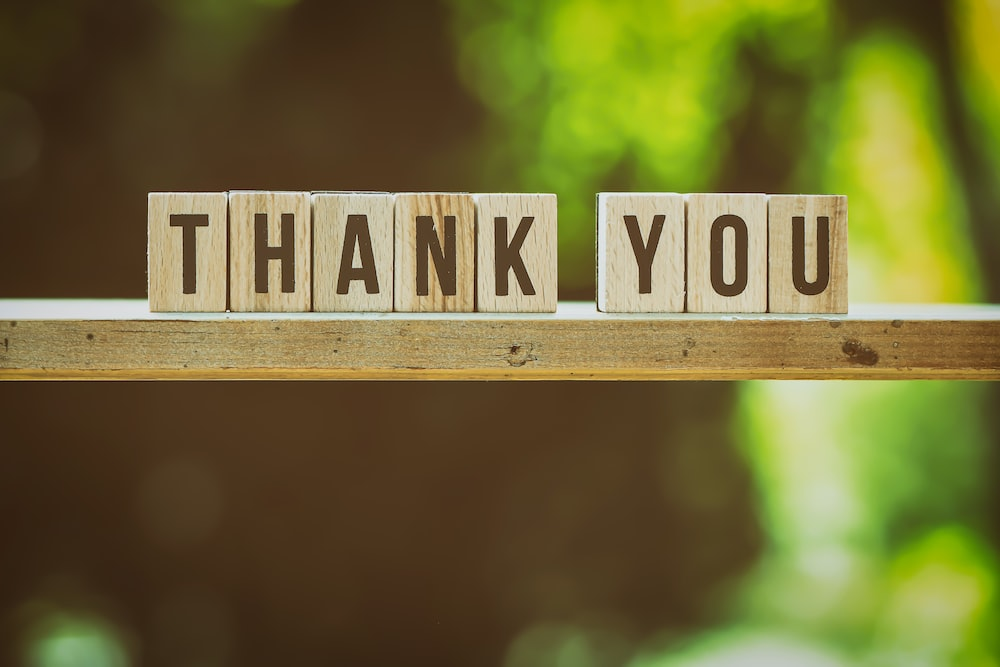